<a href="https://colab.research.google.com/github/emys-alb/ImersaoDados/blob/main/ImersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Enem 2019

In [51]:
import pandas as pd

In [52]:
import matplotlib.pyplot as plt

##Aula 01

In [53]:
url = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(url) 
dados.head(3) #Chama-se dataframe

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [54]:
dados.shape

(127380, 136)

In [55]:
dados["SG_UF_RESIDENCIA"] #serie do pandas

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [56]:
dados.columns.values
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


### Dados sobre os Estados

In [57]:
dados["SG_UF_RESIDENCIA"].unique() #Mostra cada Estado (sem repetição)
len(dados["SG_UF_RESIDENCIA"].unique()) #Quantos estados temos
dados["SG_UF_RESIDENCIA"].value_counts() #Conta quantas vezes cada estado aparece

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64


### Dados sobre idade dos participantes

In [58]:
dados["NU_IDADE"].value_counts() #Quantidade de pessoas por idade
dados["NU_IDADE"].value_counts().sort_index() #Ordernando pelo indice
#MDS COMO ASSIM GENTE DE 13 ANOS FAZENDO ENEM????????

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 1.0, 'Historiograma dos inscritos por idade')

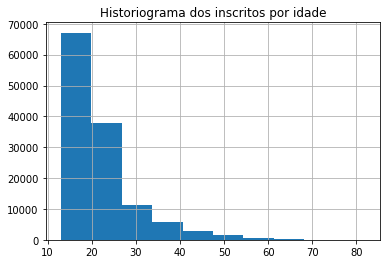

In [59]:
dados["NU_IDADE"].hist(figsize= (6,4))
plt.title("Historiograma dos inscritos por idade")

Cria um histograma porém da uma falsa impressão dos dados, sabemos que só tem 4 pessoas de 13 anos inscritas mas parece ter bem mais. Para uma analise mais detalhada aumentamos o número de bins (o nivél de detalhes do gráfico).

Text(0.5, 1.0, 'Historiograma dos inscritos por idade com range maior')

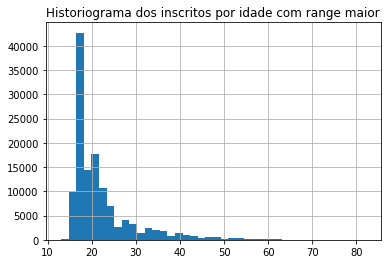

In [60]:
grafico = dados["NU_IDADE"].hist(bins = 40)
plt.title("Historiograma dos inscritos por idade com range maior")

### Desafios 001 e 002

**Fazer a proporção de inscrito por idade**

In [61]:
dados["NU_IDADE"].value_counts(normalize=True).sort_values(ascending=False).head()

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
Name: NU_IDADE, dtype: float64

**Descobrir de quais estados são os inscritos de 13 anos.**

Para fazer esse, eu ordenei os elementos pelo index em um código muito similar ao utilizado anteriormente, e  inclui a coluna SG_UF nessa série. Mostrava a UF de todos os participantes por idade, então usei o head para mostrar apenas os 4 primeiros (aka os de 13 anos).



In [62]:
dados[["NU_IDADE", "SG_UF_RESIDENCIA"]].value_counts().sort_index().head(4)

NU_IDADE  SG_UF_RESIDENCIA
13        AP                  1
          BA                  1
          MT                  1
          SP                  1
dtype: int64

Usando query:

In [63]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

### Dados sobre treineiros

In [64]:
dados.query("IN_TREINEIRO == 1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AADCCEDCCDBEABAECBABCEEACDEBDBBDBACBBEEDCADCB,AECBA99999ACDBECAACEAADBEAAAECDAECDEBAAEBCECEA...,DAADCAABECBBCBDADDEEEBCCAABADBBBECAACBDBDDCBC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,180.0,120.0,140.0,160.0,720.0,C,E,D,D,4,F,A,C,C,B,B,B,B,A,A,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AABCDEBCEBCADAAAAEEEBCEEBDECDBACBEDEAABAACDBA,99999ADABAADAEABBAACDAABCDE*DABBABDAAEDAAAACBE...,AAAEDBCCEACBDDCBEAEBBCAAAABCCBABDCAAECCABCBDE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,80.0,60.0,120.0,20.0,400.0,D,E,F,F,4,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEEAABAADADCBCEDBCCACEEDBCBCBADBBAABDBBABCEAB,99999ECABECCBABCDAEADABEBEEBEEEEEDBDDBAACDAEAA...,ACBEDECCABCEDDEDCEDAACBCAADEEDCDEECBABEBAEC*B,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,120.0,100.0,580.0,D,E,B,B,3,B,A,B,C,A,A,B,B,A,A,B,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Query só é válido para data frames

### Desafio 003

**Plotar as idades de treineiros e não treineiros**

Text(0.5, 1.0, 'Gráfico com idade dos treineiros')

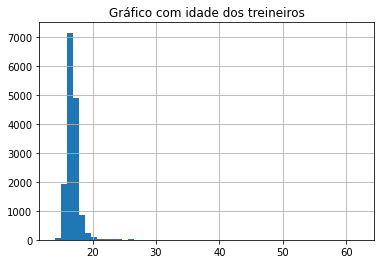

In [65]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=50)
plt.title("Gráfico com idade dos treineiros")

Text(0.5, 1.0, 'Gráfico com idade dos não-treineiros')

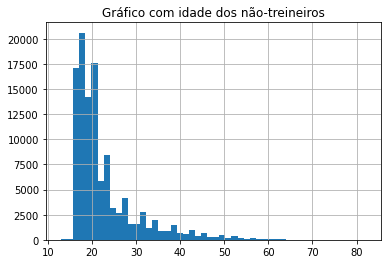

In [66]:
dados.query("IN_TREINEIRO != 1")["NU_IDADE"].hist(bins=50)
plt.title("Gráfico com idade dos não-treineiros")

### Análise das notas

Text(0.5, 1.0, 'Análise das notas de redação do ENEM 2019')

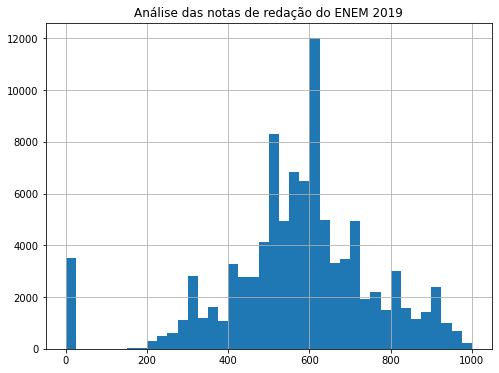

In [67]:
dados["NU_NOTA_REDACAO"].hist(bins = 40, figsize =(8,6))
plt.title("Análise das notas de redação do ENEM 2019")

In [68]:
dados['NU_NOTA_REDACAO'].mean() #Calcula média

571.5700253970197

In [69]:
dados['NU_NOTA_REDACAO'].std() #Calcula o desvio padrão

188.07645455749753

Text(0.5, 1.0, 'Análise das notas de Limguagens e Códigos do ENEM 2019')

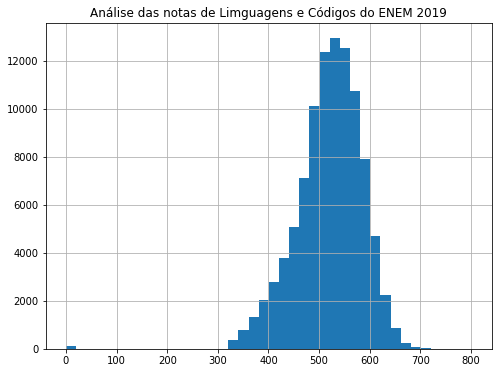

In [70]:
dados["NU_NOTA_LC"].hist(bins = 40, figsize =(8,6))
plt.title("Análise das notas de Limguagens e Códigos do ENEM 2019")

In [71]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


E esse 25%?50%?75%? são quantis. Às vezes queremos parcelas maiores ou menores que a mediana(50%).

In [72]:
dados['NU_NOTA_LC'].quantile(0.9) #10% mais altos

596.3

Text(0.5, 1.0, 'Boxplot das notas de Linguagens e Códigos')

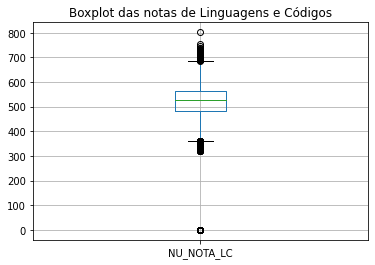

In [73]:
dados['NU_NOTA_LC'].plot.box(grid= True) #Boxplot
plt.title("Boxplot das notas de Linguagens e Códigos")

Text(0.5, 1.0, 'Boxplot das notas de todas as áreas')

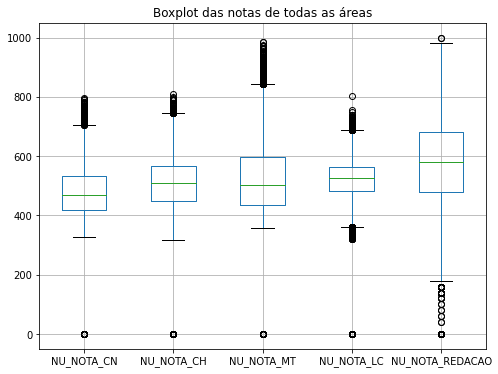

In [74]:
dados[provas].boxplot(grid=True, figsize= (8,6))
plt.title("Boxplot das notas de todas as áreas")

### Desafio 004

Comparar as distribuição das provas em ingles e espanhol

## Aula 02

### Análise por idades (gráficos)

In [75]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
GO     7
PB     7
PI     7
MT     4
DF     4
AM     4
SE     3
TO     3
PR     3
RO     2
AL     2
SC     2
RN     1
AP     1
RJ     1
ES     1
RS     1
AC     1
MS     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [76]:
dados.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize=True).sort_values(ascending=False).head() #dá a proporção

SP    0.234347
MG    0.100704
BA    0.063796
CE    0.062516
PE    0.057778
Name: SG_UF_RESIDENCIA, dtype: float64

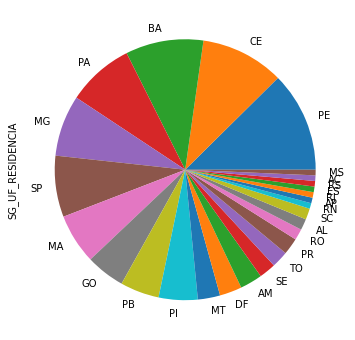

In [77]:
alunos_ate_quartoze = dados.query("NU_IDADE <= 14")
alunos_ate_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(8,6))

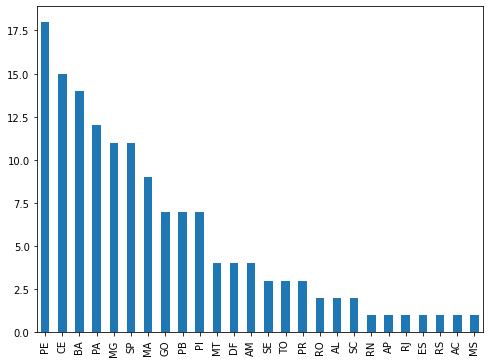

In [78]:
alunos_ate_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(8,6))

### Boxplot

###Desafio 5
**Criar uma função para plotar o boxplot do seaborn**

Para criar essa função, copiei o código que estava se repetindo e analise o que mudava. O eixo y era a principal mundança e o título.

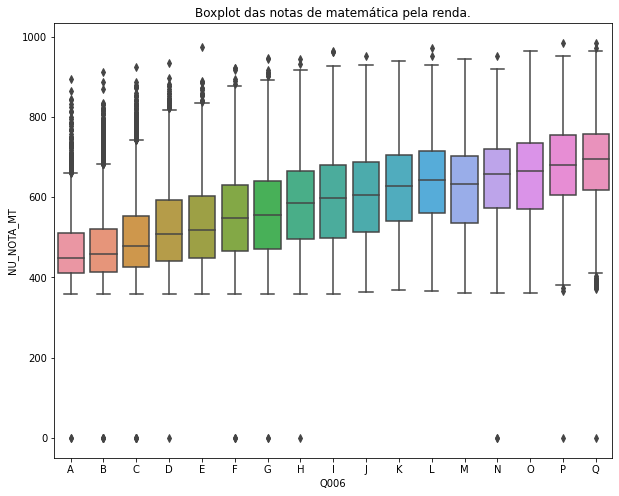

In [79]:
import seaborn as sns

def plotbox(y, descr, acr):
  plt.figure(figsize=(10, 8))
  sns.boxplot(x="Q006", y = y, data = dados, order = renda_ordenada)
  plt.title("Boxplot das notas %s pela renda%s"%(descr, acr))

renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

plotbox("NU_NOTA_MT", "de matemática", ".")

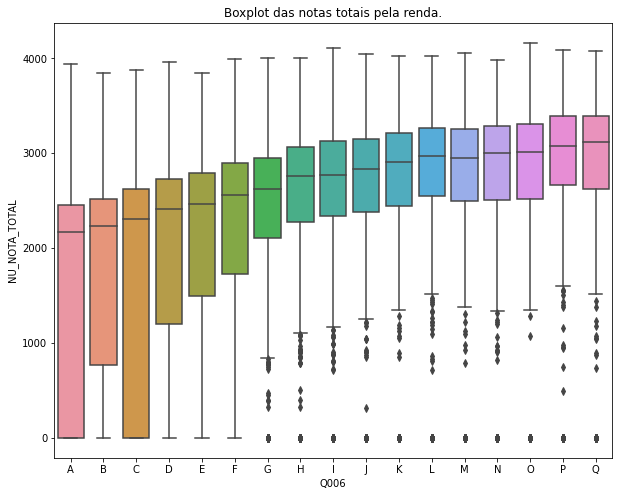

In [80]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1) #Faz a soma pelas linhas

plotbox("NU_NOTA_TOTAL", "totais", ".")

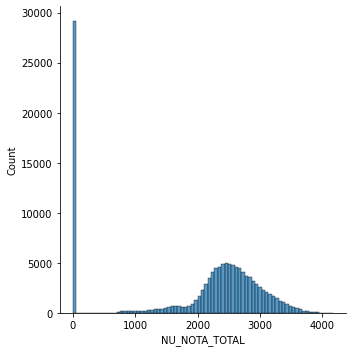

In [81]:
sns.displot(dados, x="NU_NOTA_TOTAL")

In [82]:
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [83]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


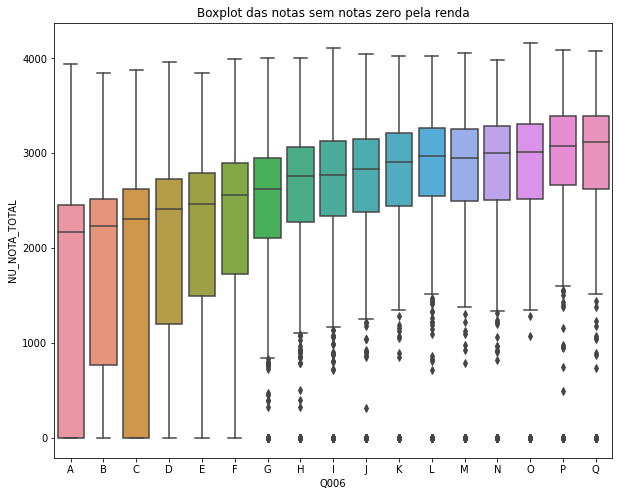

In [84]:
plotbox("NU_NOTA_TOTAL", "sem notas zero","")

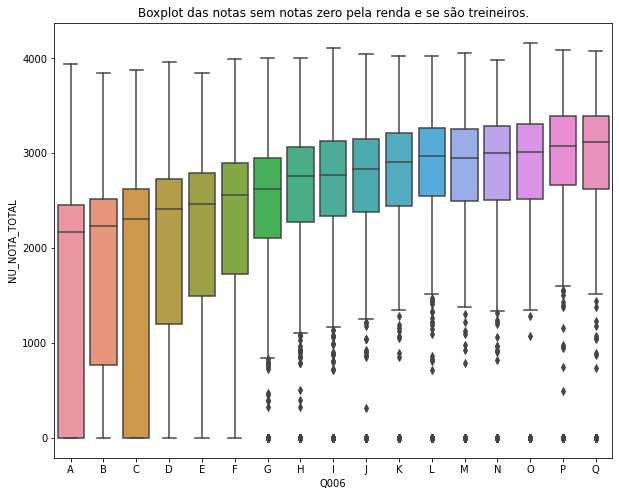

In [85]:
plotbox("NU_NOTA_TOTAL", "sem notas zero", " e se são treineiros.")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

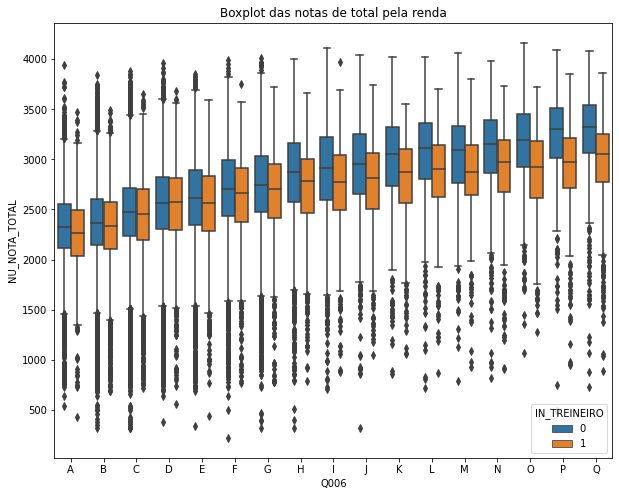

In [86]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

### Desafios da aula

Desafio 6: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 7: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 8: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

###Desafio 9
Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

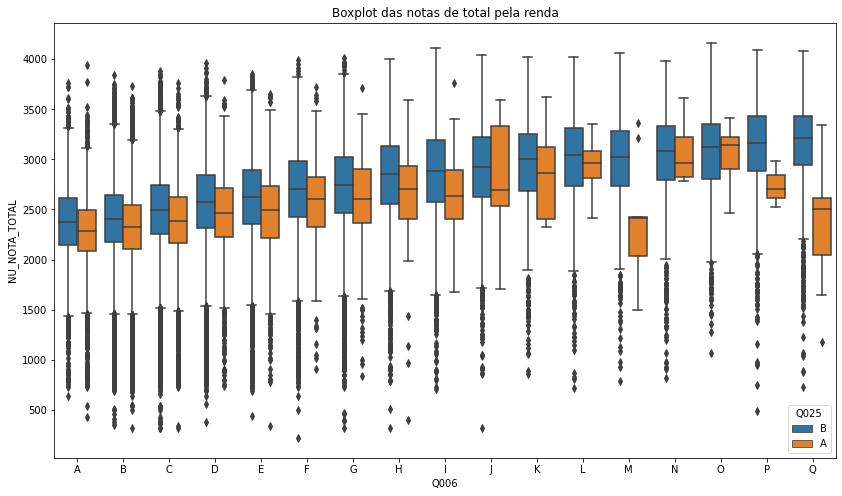

In [87]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "Q025", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

## Aula 03

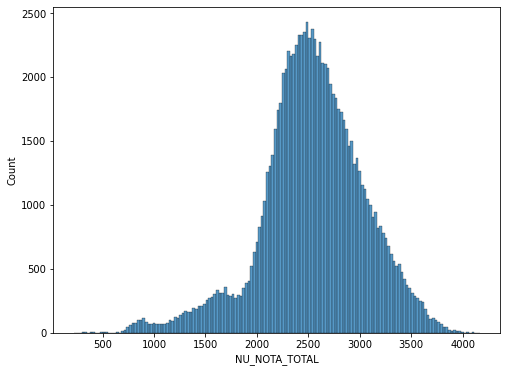

In [88]:
plt.figure(figsize=(8,6))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

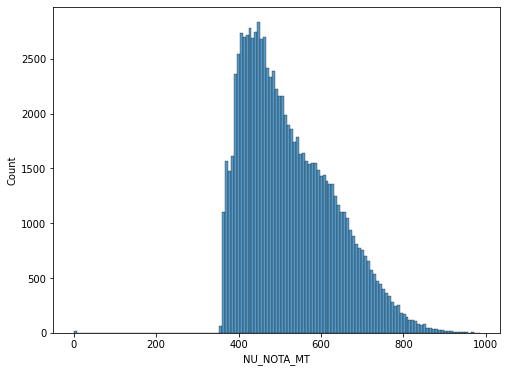

In [89]:
plt.figure(figsize=(8,6))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")

### Desafio 10

Plotar as médias, mediana e moda nas notas de LC e MT.

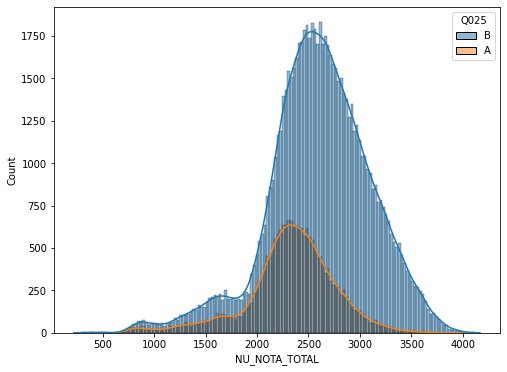

In [90]:
plt.figure(figsize=(8,6))
sns.histplot(dados_sem_notas_zero, x= "NU_NOTA_TOTAL", hue="Q025", kde=True)

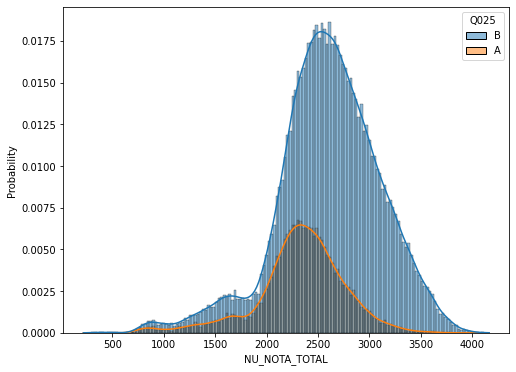

In [91]:
plt.figure(figsize=(8,6))
sns.histplot(dados_sem_notas_zero, x= "NU_NOTA_TOTAL", hue="Q025", kde=True, stat='probability')

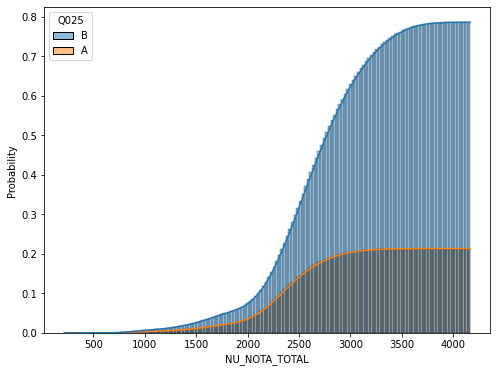

In [92]:
plt.figure(figsize=(8,6))
sns.histplot(dados_sem_notas_zero, x= "NU_NOTA_TOTAL", hue="Q025", kde=True, stat='probability', cumulative=True)

### Mostrando a correlação entre as notas

(-50.0, 1050.0)

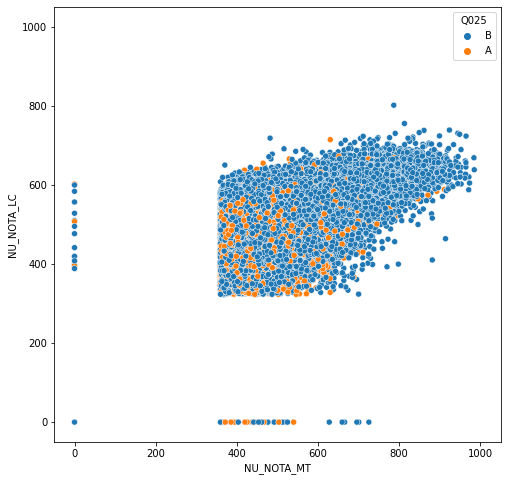

In [93]:
plt.figure(figsize=(8,8))
sns.scatterplot(data= dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

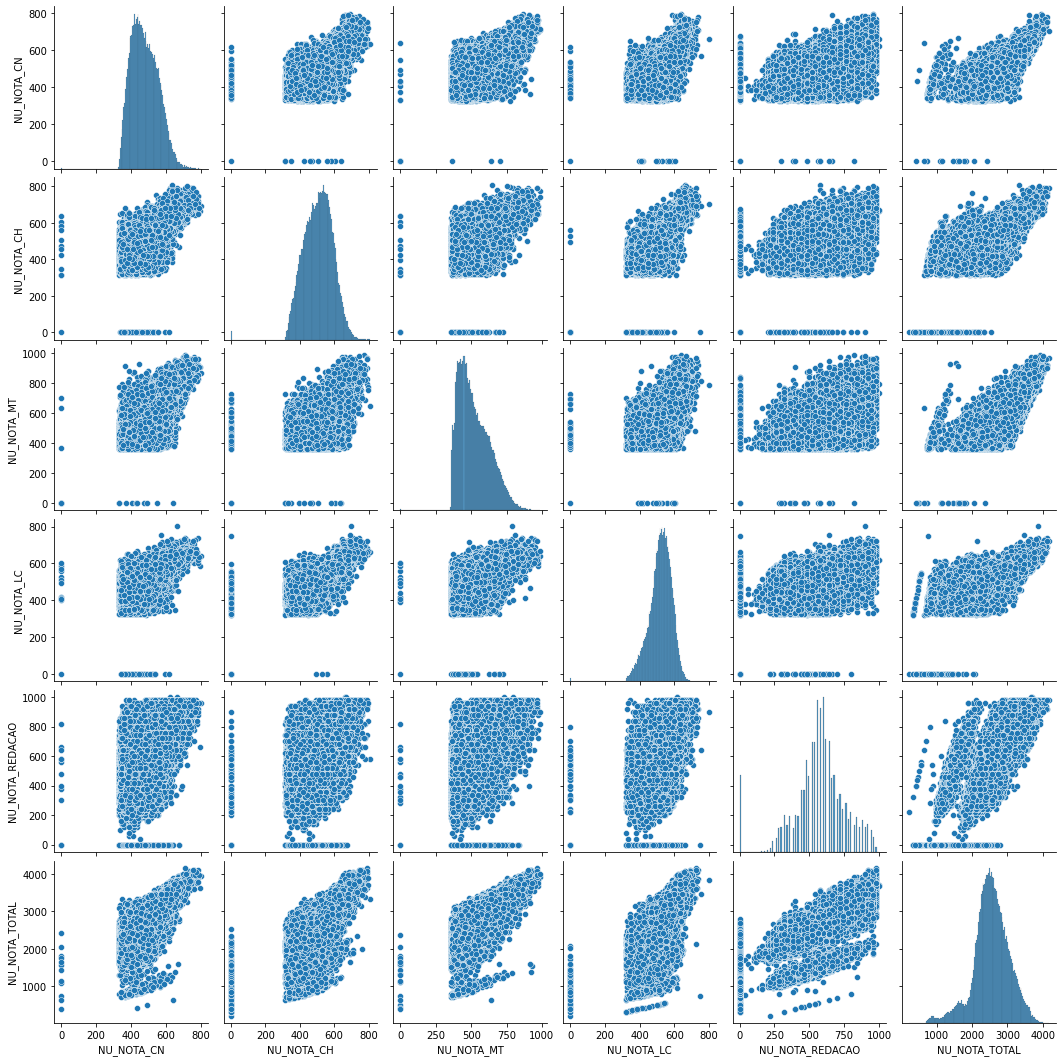

In [94]:
sns.pairplot(dados_sem_notas_zero[provas])

Correlação vai de 1 até -1. (Procurar Pearson Correlation, é a utilizada pela biblioteca)

In [95]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


Criando um mapa de calor: adicionamos a correlação, o set de cores,o centro e se queremos anotações

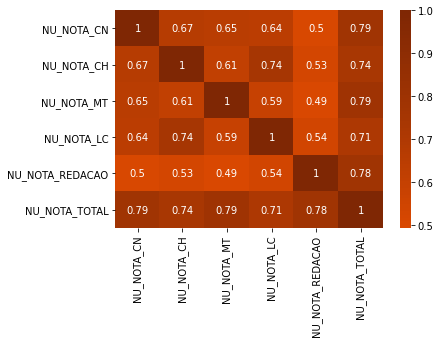

In [96]:
sns.heatmap(correlacao, cmap="Oranges", center=0, annot=True)

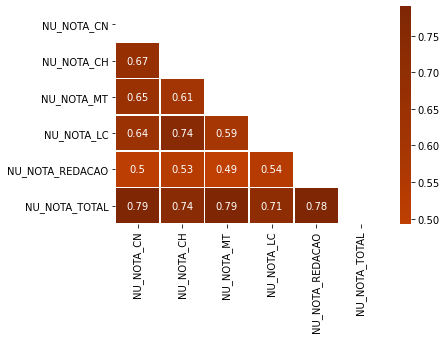

In [97]:
#Como a partir do meio se repete, podemos utilizar a matriz diagonal
import numpy as np

sns.heatmap(correlacao, mask=np.triu(np.ones_like(correlacao, dtype=bool)), center=0, cmap="Oranges", linewidths=.5, annot=True)

## Aula 04

### Machine Learning

Queremos fazer a previsão das notas de Matemática a partir das notas das demais provas.

In [116]:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
prova_saida = 'NU_NOTA_MT'

dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()

notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

notas_entrada

,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_REDACAO
0,512.3,435.6,488.6,420.0
2,499.1,423.2,441.0,560.0
3,578.1,426.2,551.5,500.0
4,571.3,516.5,511.2,780.0
5,618.7,559.6,607.5,900.0
...,...,...,...,...
127373,501.5,480.4,485.3,520.0
127375,559.6,502.4,525.7,740.0
127376,380.9,449.1,450.3,520.0
127378,416.2,564.7,517.3,620.0


Podemos notar que o processo segue um procedimento parecido com o de uma função, do tipo f(x) = y. Para maior entedimento vamos usar as váriaveis da seguinte maneira:

In [117]:
x = notas_entrada
y = notas_saida

Primeiro queremos testar para saber se isso vai dá certo, além de treinar o algoritmo. Para isso vamos separar em dois volumes de dados: um para treinamento e outro para testes, usando a biblioteca sklearn.

In [118]:
from sklearn.model_selection import  train_test_split

SEED = 4321 #padronizar as saidas porque a função por default é random

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state=SEED)

In [119]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_REDACAO
90200,567.7,542.7,523.2,660.0
12375,497.1,445.2,423.0,580.0
46320,494.0,454.0,528.5,520.0
111208,561.9,385.8,572.7,640.0
75943,686.5,625.7,646.5,900.0


Separamos os volumes de dados, agora podemos criar o modelo.

In [120]:
from sklearn.svm import  LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

E vamos de prever as notas de MT

In [125]:
predicoes_mt = modelo.predict(x_teste)
predicoes_mt

array([564.48610537, 628.305027  , 509.98098555, ..., 607.78717234,
       734.22766309, 466.91968988])

In [122]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

AAAAAAAAAAAAAA ELE TÁ APRENDENDO AAAAAAAAAAAAAA
<br> Mas vamos verificar com um gráfico

(-50.0, 1050.0)

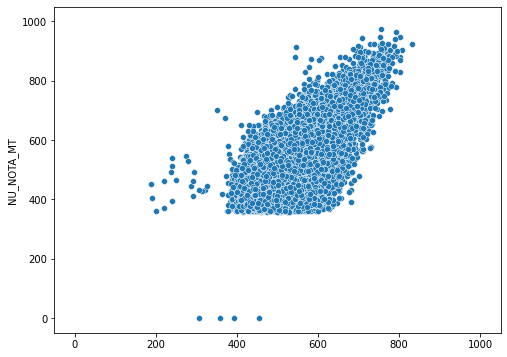

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= predicoes_mt, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Vamos ver no eixo y quanto ele errou de fato

(-500.0, 1050.0)

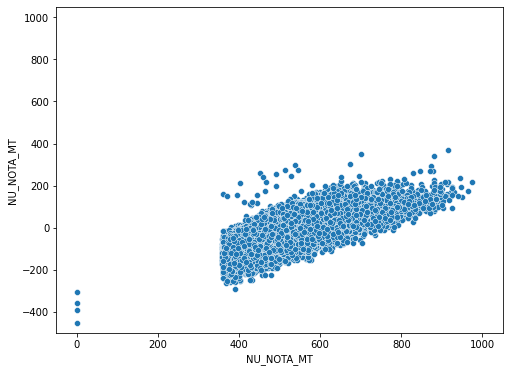

In [132]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= y_teste, y=y_teste - predicoes_mt)
plt.xlim((-50, 1050))
plt.ylim((-500, 1050))

Ele é tendencioso, para pessoas com notas baixas ele prever uma nota mais baixa e a mesma correlação para notas altas.

In [137]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_mt
resultados["Diferença"] = resultados["Real"] - resultados["Previsao"]
resultados["Quad_Diferença"] = (resultados["Real"] - resultados["Previsao"]) ** 2 #Mantem os resultados

resultados

,Real,Previsao,Diferença,Quad_Diferença
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [138]:
resultados["Quad_Diferença"].mean()

6604.415306219518

In [139]:
resultados["Quad_Diferença"].mean()**(1/2)

81.26755383435334

In [142]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)

dummy_precicoes = modelo_dummy.predict(x_teste)

In [141]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_precicoes)

12063.645588509502

In [143]:
mean_squared_error(y_teste, predicoes_mt)

6604.415306219554

Desafio

Procurar outro modelo de ML para treinar e comparar.